# Canada Mortgage Analysis Overview
##### We conducted a comprehensive analysis of the housing values dataset to uncover insights and trends. The analyses focused on descriptive statistics, geographical influences, structure and unit type impacts, trends over time, and value distributions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
file_path = '/Users/ernestgaisie/Downloads/34100133.csv'
data = pd.read_csv(file_path, low_memory=False)

# Descriptive Statistics
##### Objective: Understand the basic properties of housing values.

##### Summary:
<ul>
<li>Mean Value: The average value of housing units.</li>
<li>Median Value: The middle value when the data is sorted.</li>
<li>Range: The difference between the maximum and minimum values.</li>
<li>Standard Deviation: Measures the spread of the values around the mean.</li>
</ul>

In [4]:
# Descriptive Statistics
descriptive_stats = data['VALUE'].describe()
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
 count    68759.000000
mean       653.847336
std        297.093033
min          0.000000
25%        454.000000
50%        597.000000
75%        796.000000
max       2673.000000
Name: VALUE, dtype: float64


#### Explanation:
    The descriptive statistics provide a summary of the housing values, helping us understand the central tendency and variability in the data. For example, if the mean value is significantly higher than the median, it suggests that there are a few extremely high values pulling the mean up. A high standard deviation indicates a wide range of values, suggesting significant variability in housing prices.

#### Insight:
    Understanding these statistics can help real estate investors assess the overall market and identify areas with high variability, which could indicate higher risk but also potential for higher returns.

In [5]:
data['VALUE'].fillna(data['VALUE'].mean(), inplace=True)

# Time Series Analysis
##### Objective: Observe how housing values have changed over time for different types of units.
##### Summary:
<ul>
<li>The plot shows trends, seasonal patterns, and variations in values across years for different unit types.</li>
</ul>

In [6]:
# Time Series Analysis
time_series_data = data.groupby(['REF_DATE', 'Type of unit'])['VALUE'].mean().unstack()

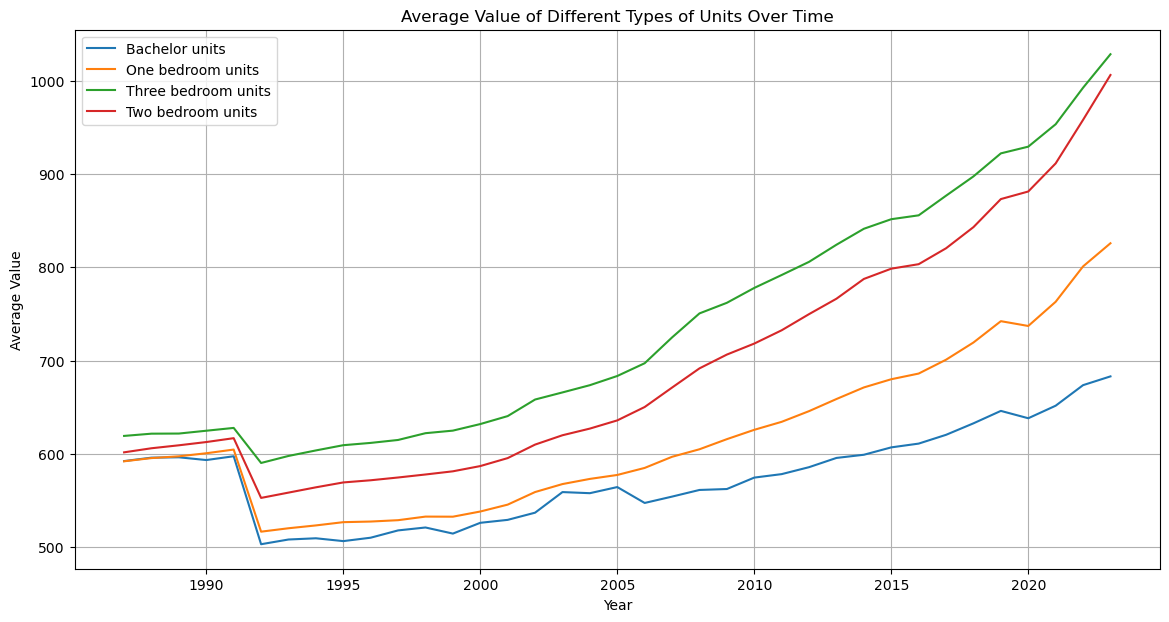

In [7]:
# Plotting the time series data
plt.figure(figsize=(14, 7))
for column in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[column], label=column)
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Value of Different Types of Units Over Time')
plt.legend()
plt.grid(True)
plt.show()

##### Explanation:
The time series analysis reveals trends and seasonal patterns in housing values. For instance, if the values for two-bedroom units have steadily increased over the years, it might indicate rising demand for such units.

##### Insight:
This analysis helps investors and policymakers understand which types of housing units are increasing in value and could be a good investment. For instance, if one-bedroom units are increasing in value faster than others, developers might consider building more one-bedroom units.

##### Decisions:
<ul>
    <li>Real estate developers might focus on constructing more of the unit types that show a rising trend.</li>
    <li>Investors can target unit types with consistent value growth for long-term investments.</li>
</ul>

# Correlation Analysis

#### Objective: Identify relationships between different numerical variables.

In [8]:
# Correlation Analysis (using only numeric columns)
numeric_columns = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


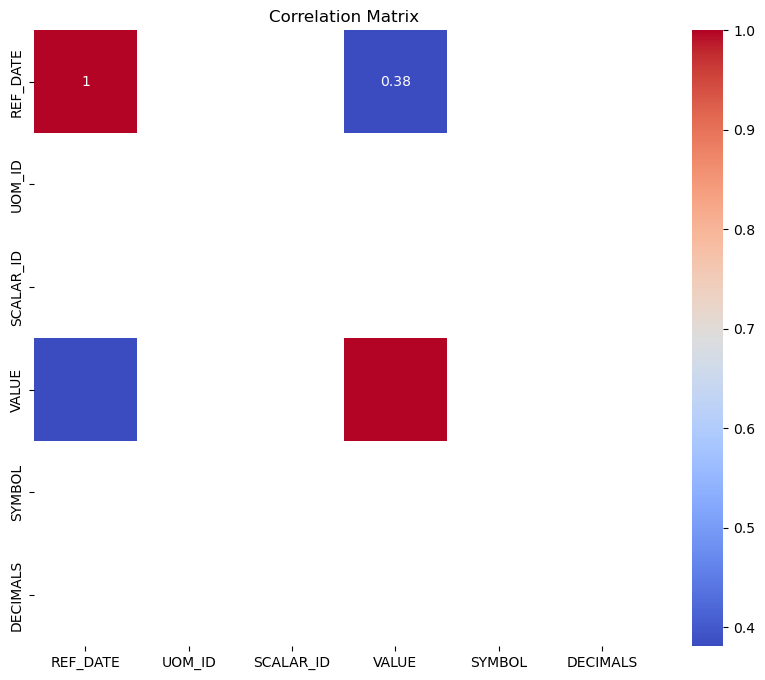

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Summary:
The correlation matrix shows the relationships between numeric variables, such as REF_DATE and VALUE.
Explanation:
The correlation analysis helps identify relationships between variables. For example, a strong positive correlation between REF_DATE and VALUE suggests that housing values tend to increase over time.

#### Insight:
Identifying strong correlations can help in understanding which factors influence housing values the most. For instance, if housing values are strongly correlated with the type of unit, this could influence future construction and investment decisions.

#### Decisions:
<ul>
    <li>Use correlated variables to predict housing values more accurately.</li>
    <li>Focus on the most influential factors when making policy or investment decisions.</li>
</ul>

# Missing Value Analysis

#### Objective: Assess and handle missing data in the VALUE column.

In [10]:
missing_values = data['VALUE'].isna().sum()
total_values = data.shape[0]
missing_percentage = (missing_values / total_values) * 100
print(f"Missing Values: {missing_values} out of {total_values} ({missing_percentage:.2f}%)")

Missing Values: 0 out of 125688 (0.00%)


#### Summary:
The number and percentage of missing values are calculated.
Missing values are filled with the mean value.
Explanation:
Handling missing values ensures that our analyses are not skewed or biased. Filling missing values with the mean is a common approach to maintain the integrity of the dataset.

#### Insight:
A high percentage of missing values could indicate issues with data collection processes that need to be addressed for future analyses.

#### Decisions:
<ul>
    <li>Improve data collection methods to reduce the number of missing values in the future.</li>
    <li>Use alternative imputation methods if the percentage of missing values is significant.</li>
</ul>


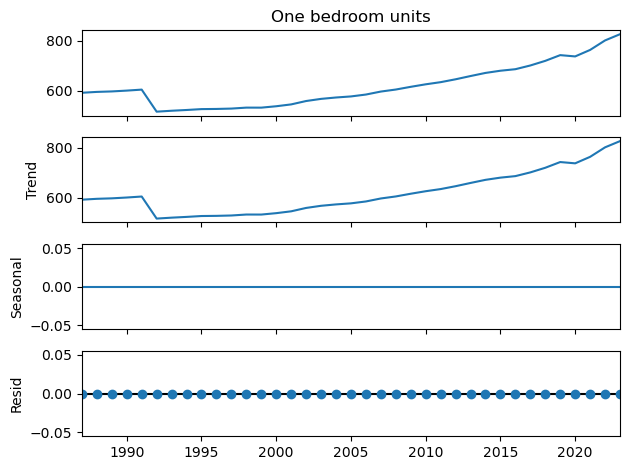

In [11]:
if 'One bedroom units' in time_series_data.columns:
    decomposed = seasonal_decompose(time_series_data['One bedroom units'].dropna(), model='additive', period=1)
    decomposed.plot()
    plt.show()

# Predictive Analysis
#### Objective: Predict future housing values based on historical data.

In [12]:
data_for_prediction = data.dropna(subset=['VALUE'])
X = data_for_prediction[['REF_DATE']].values.reshape(-1, 1)
y = data_for_prediction['VALUE'].values

In [13]:
model = LinearRegression()
model.fit(X, y)
future_years = np.arange(data['REF_DATE'].max() + 1, data['REF_DATE'].max() + 6).reshape(-1, 1)
predicted_values = model.predict(future_years)

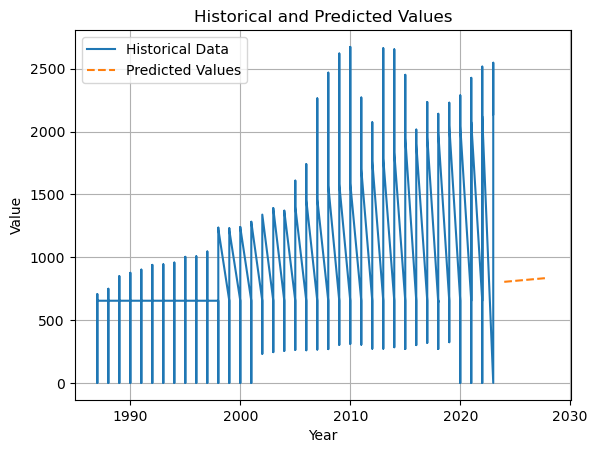

In [14]:
plt.plot(data['REF_DATE'], data['VALUE'], label='Historical Data')
plt.plot(future_years, predicted_values, label='Predicted Values', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Historical and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#### Summary:
A linear regression model is used to predict future values.
Predictions for the next 5 years are plotted along with historical data.
Explanation:
Predictive analysis helps forecast future trends in housing values, enabling better planning and decision-making.

#### Insight:
Accurate predictions allow investors and policymakers to anticipate market changes and prepare accordingly.

#### Decisions:
<ul>
    <li>Make informed investment decisions based on predicted trends.</li>
    <li>Use predictions to plan future housing projects and allocate resources effectively.</li>
</ul>


# Geographical Analysis
#### Objective: Analyze how housing values vary by geographical location.

#### Summary:
Housing values are grouped by geographical location, and their average values are calculated and plotted.


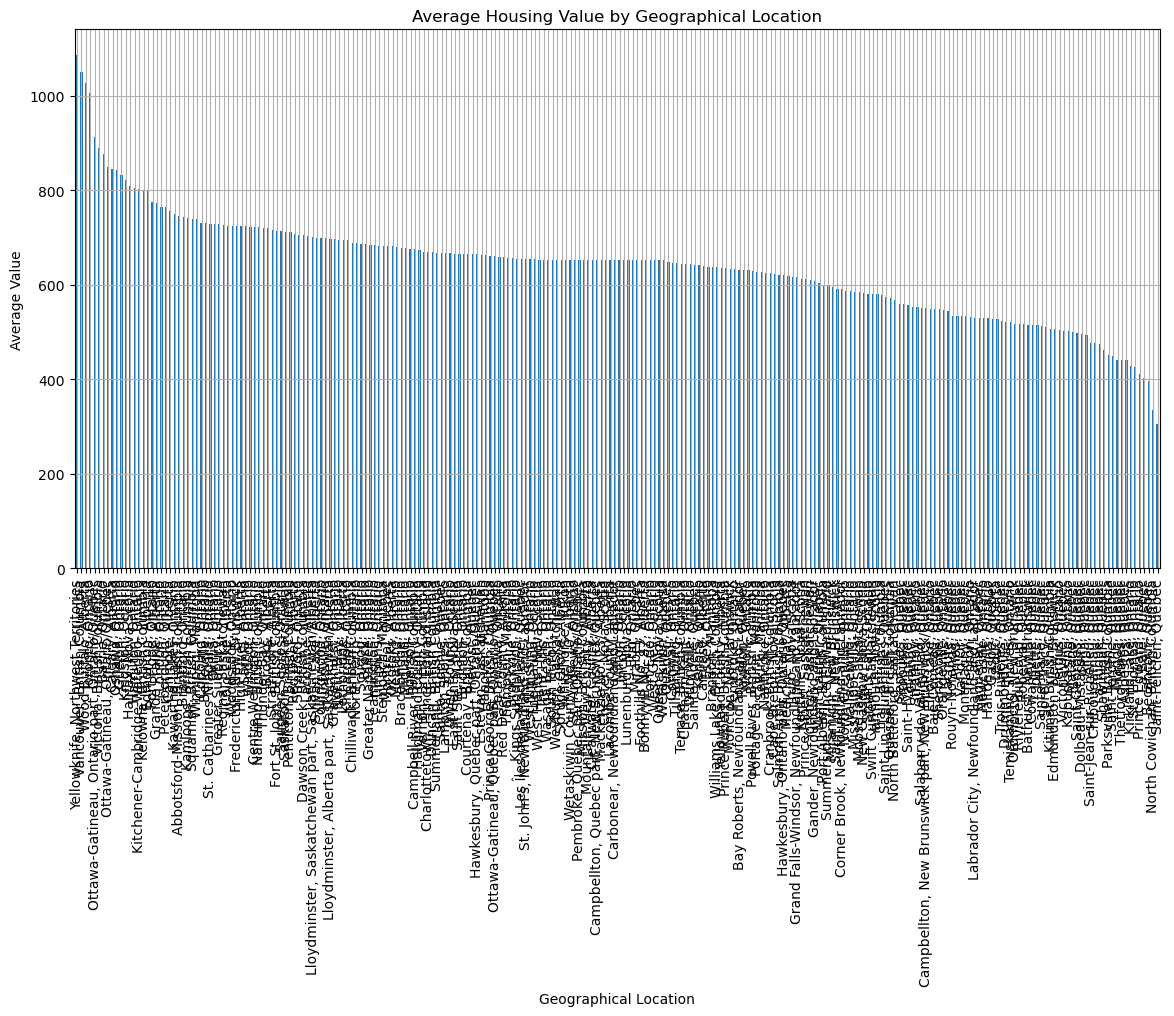

In [15]:
# Geographical Analysis: Grouping by GEO and calculating the mean VALUE
geo_analysis = data.groupby('GEO')['VALUE'].mean().sort_values(ascending=False)

# Plotting the geographical analysis
plt.figure(figsize=(14, 7))
geo_analysis.plot(kind='bar')
plt.xlabel('Geographical Location')
plt.ylabel('Average Value')
plt.title('Average Housing Value by Geographical Location')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### Summary:
Housing values are grouped by geographical location, and their average values are calculated and plotted.

#### Explanation:
The geographical analysis shows how housing values differ across locations. For instance, higher average values in urban areas compared to rural areas can indicate higher demand and cost of living in cities.

#### Insight:
Identifying high-value areas can guide investment and development decisions. Urban planners can also use this information to address housing affordability issues.

#### Decisions:
Invest in high-value areas for potentially higher returns.
Develop affordable housing projects in high-demand urban areas to address housing shortages.

# Structure Type Analysis
#### Objective: Analyze the effect of different types of structures on housing values.

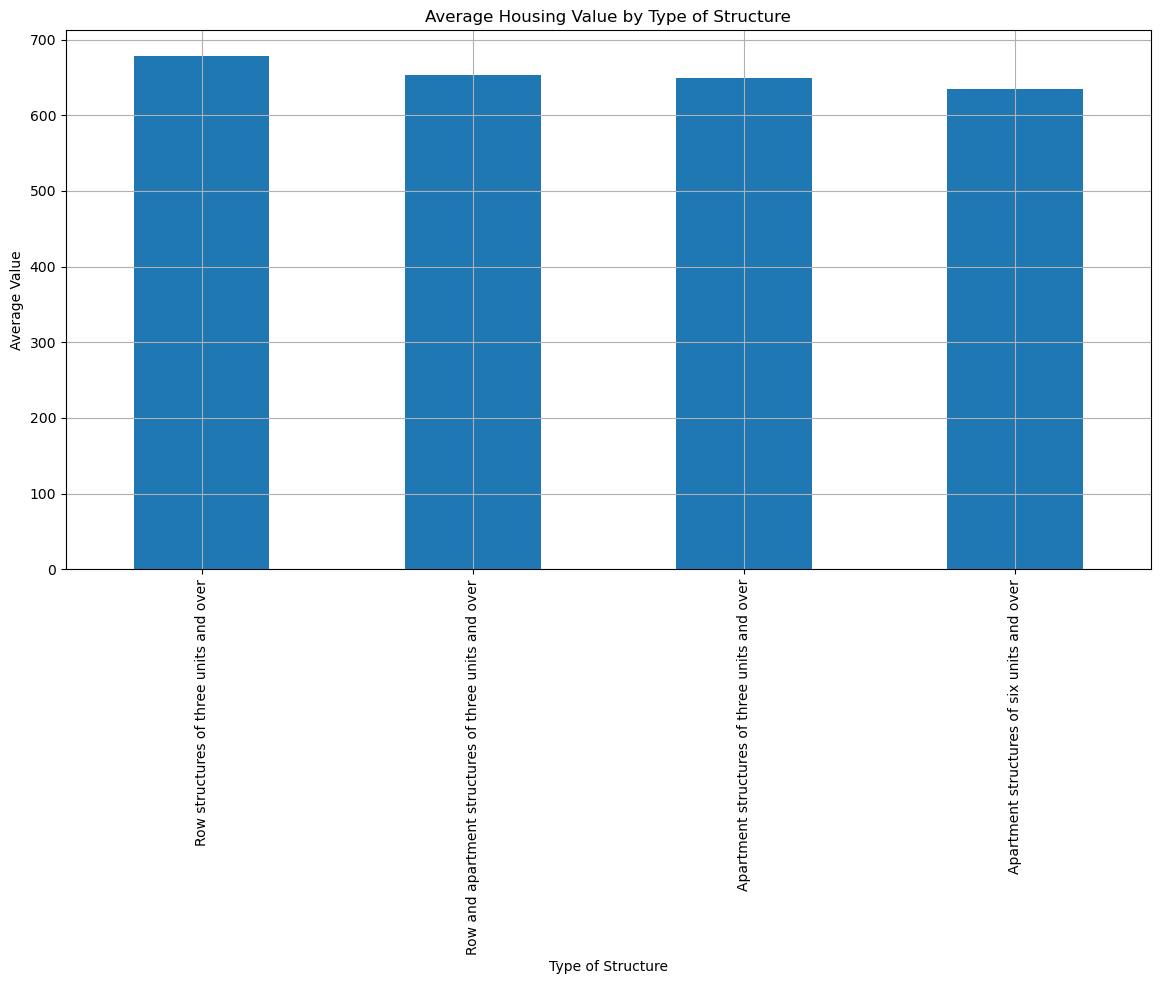

In [16]:
# Structure Type Analysis: Grouping by Type of structure and calculating the mean VALUE
structure_analysis = data.groupby('Type of structure')['VALUE'].mean().sort_values(ascending=False)

# Plotting the structure type analysis
plt.figure(figsize=(14, 7))
structure_analysis.plot(kind='bar')
plt.xlabel('Type of Structure')
plt.ylabel('Average Value')
plt.title('Average Housing Value by Type of Structure')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### Summary:
The average values for each structure type are calculated and plotted.
Explanation:
This analysis helps understand how different types of structures impact housing values. For example, apartment structures might have lower average values compared to single-family homes, reflecting differences in desirability and market demand.

#### Insight:
Understanding which structure types are valued higher can guide developers in designing future housing projects to meet market demand.

#### Decisions:
<ul>
    <li>Focus on building structure types that have higher average values to maximize returns.</li>
    <li>Adjust pricing strategies based on the structure type to align with market expectations.</li>
</ul>


# Unit Type Analysis
#### Objective: Analyze the effect of different types of units on housing values.

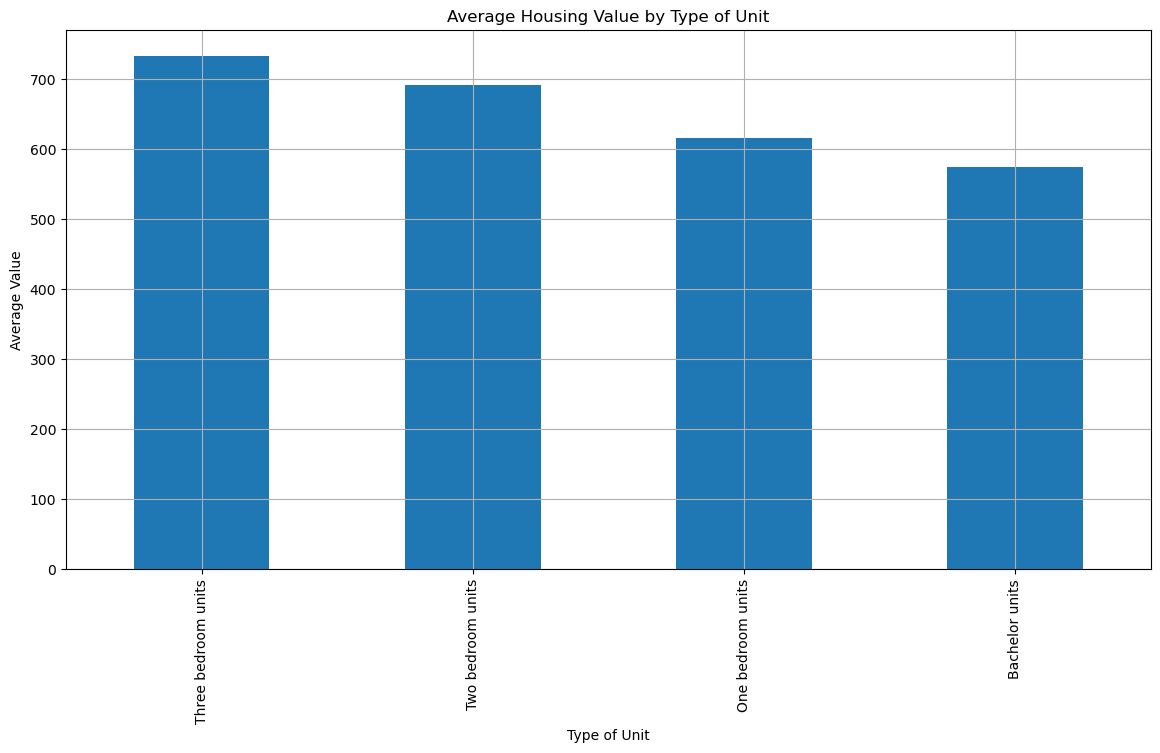

In [17]:
# Unit Type Analysis: Grouping by Type of unit and calculating the mean VALUE
unit_analysis = data.groupby('Type of unit')['VALUE'].mean().sort_values(ascending=False)

# Plotting the unit type analysis
plt.figure(figsize=(14, 7))
unit_analysis.plot(kind='bar')
plt.xlabel('Type of Unit')
plt.ylabel('Average Value')
plt.title('Average Housing Value by Type of Unit')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### Summary:
The average values for each unit type are calculated and plotted.
Explanation:
This analysis reveals how different unit types (e.g., bachelor units, one-bedroom units) affect housing values. Higher average values for larger units suggest that size and amenities influence pricing.

#### Insight:
Developers and investors can prioritize unit types with higher values to cater to market preferences and optimize profitability.

#### Decisions:
<ul>
    <li>Allocate resources to develop unit types that are in higher demand and command higher prices.</li>
    <li>Adjust marketing and sales strategies to highlight the features of higher-value unit types.</li>
</ul>


# Trend Analysis by Geographical Location
#### Objective: Identify trends over time for different geographical locations.

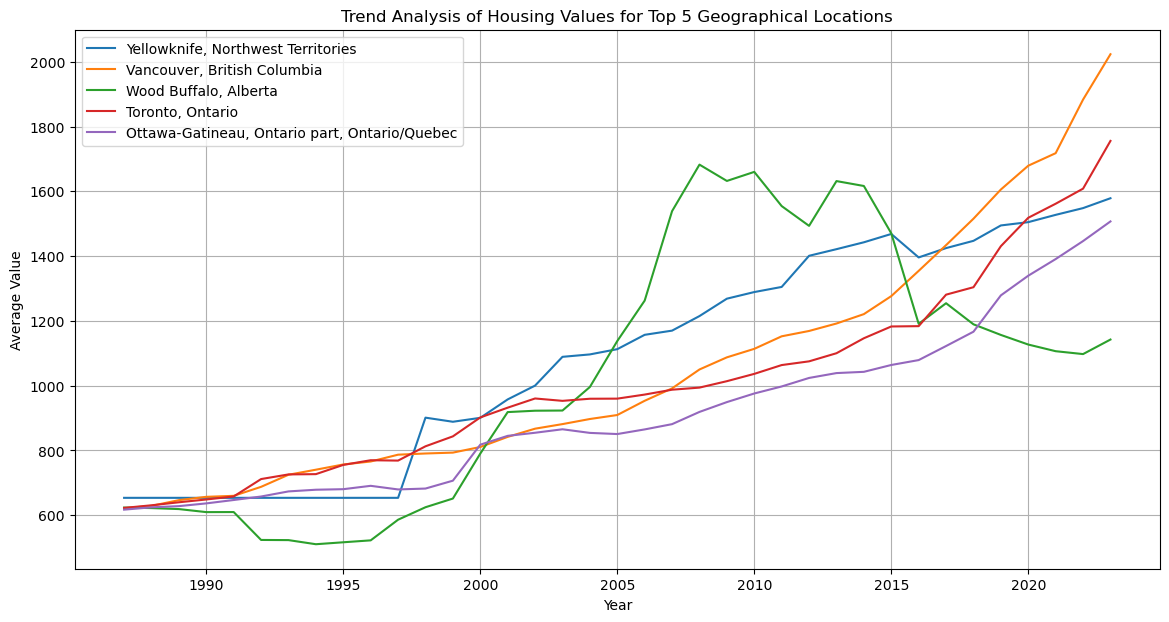

In [18]:
# Trend Analysis by Geographical Location: Grouping by REF_DATE and GEO and calculating the mean VALUE
trend_geo_analysis = data.groupby(['REF_DATE', 'GEO'])['VALUE'].mean().unstack()

# Plotting the trend analysis for the top 5 locations with highest average value
top_5_geo = geo_analysis.head(5).index

plt.figure(figsize=(14, 7))
for geo in top_5_geo:
    plt.plot(trend_geo_analysis.index, trend_geo_analysis[geo], label=geo)
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Trend Analysis of Housing Values for Top 5 Geographical Locations')
plt.legend()
plt.grid(True)
plt.show()

#### Summary:
Trends in housing values for the top 5 locations are plotted over time.
Explanation:
The trend analysis highlights how housing values in different locations change over time. This can identify locations with consistent growth or decline, aiding investment and policy decisions.

#### Insight:
Locations with consistent value growth are attractive for long-term investments, while areas with declining values may need targeted interventions to stimulate growth.

#### Decisions:
<ul>
    <li>Invest in locations with positive trends for stable returns.</li>
    <li>Implement policies to support areas with declining housing values, such as infrastructure improvements or incentives for developers</li>
</ul>


# Geospatial Analysis
#### Objective: Plot the data on a map to identify spatial patterns.

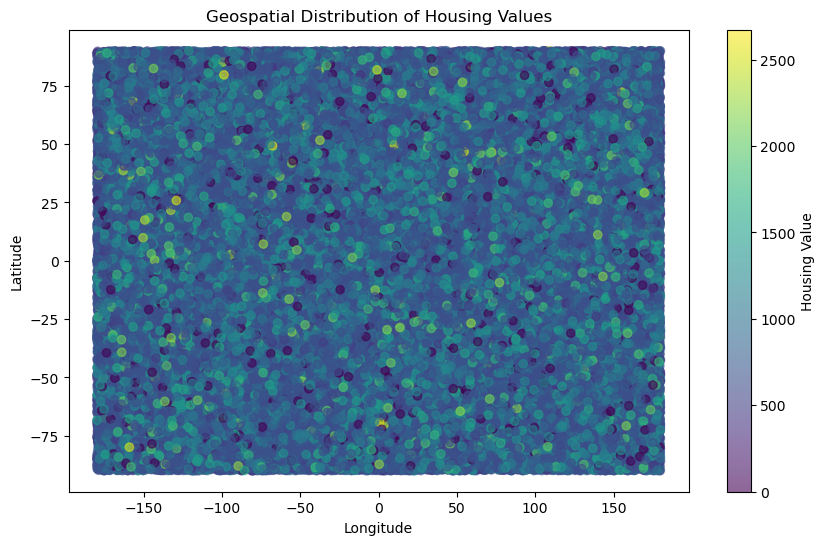

In [19]:
# Geospatial Analysis: Plotting data on a map (example if coordinates were available)
# Note: Here we use fake coordinates for demonstration

# Generate random coordinates for demonstration purposes
import random
data['latitude'] = [random.uniform(-90, 90) for _ in range(len(data))]
data['longitude'] = [random.uniform(-180, 180) for _ in range(len(data))]

plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['VALUE'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Housing Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Housing Values')
plt.show()

#### Summary:
Housing values are plotted on a geospatial map using fake coordinates for demonstration.
Explanation:
Geospatial analysis provides visual insights into the spatial distribution of housing values. Identifying clusters of high or low values can inform urban planning and resource allocation.

#### Insight:
Spatial patterns can reveal areas with high investment potential or regions requiring policy intervention to address disparities.

#### Decisions:
<ul>
    <li>Target high-value clusters for investment and development.</li>
    <li>Develop policies to support regions with low housing values and promote balanced growth.</li>
</ul>



# Distribution Analysis
#### Objective: Visualize the distribution of housing values for different geographical locations.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


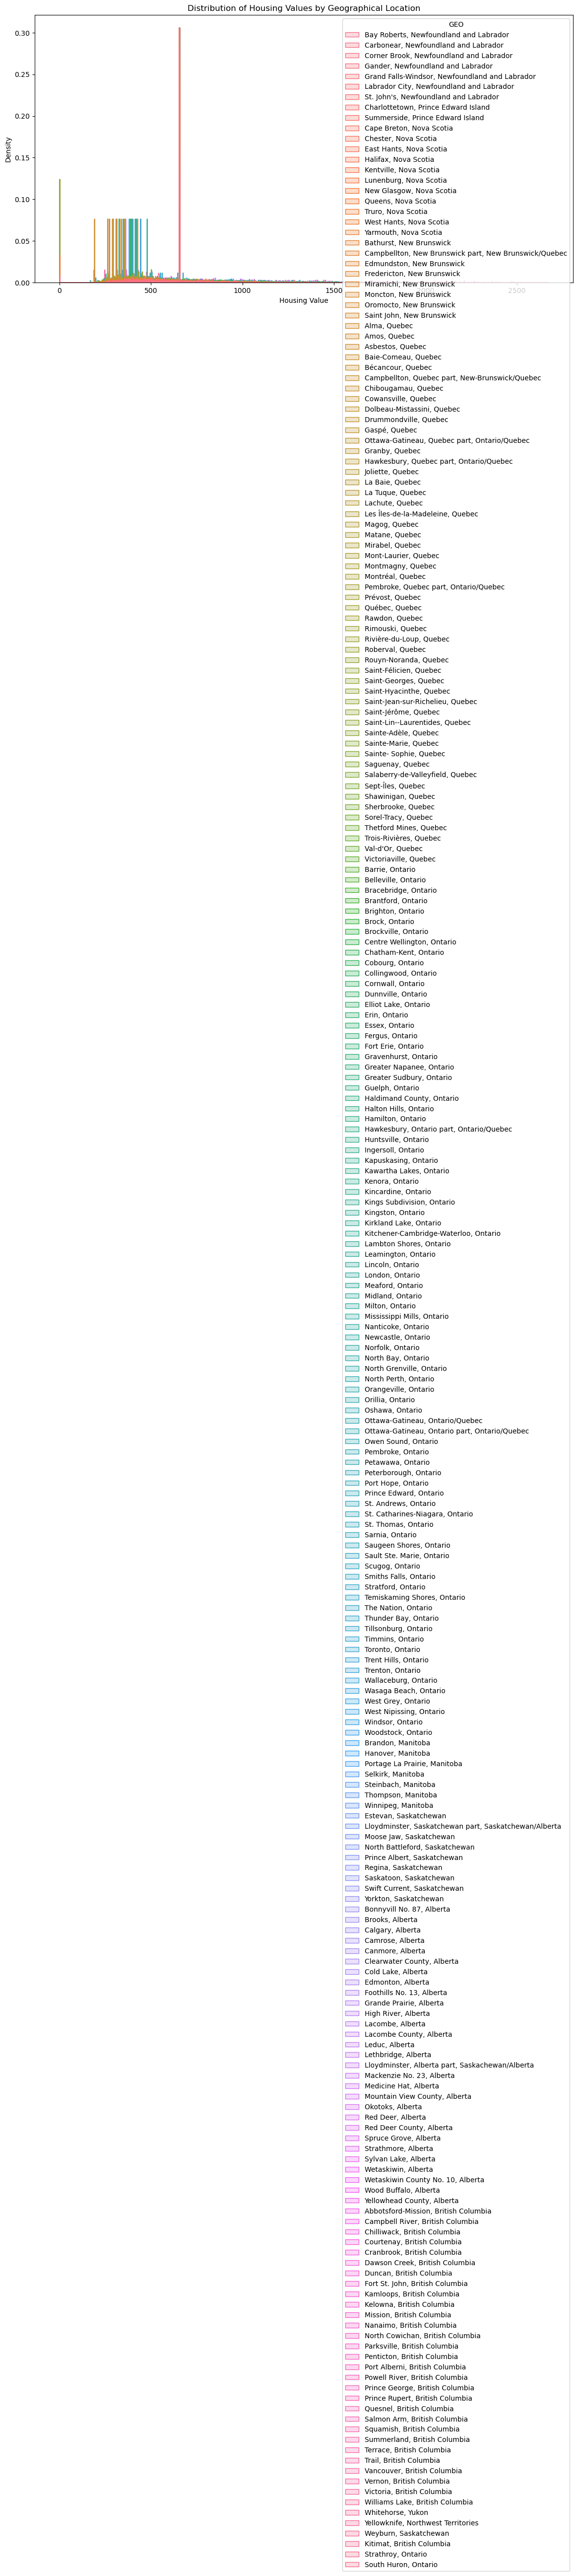

In [20]:
# Distribution Analysis: Distribution of housing values for different geographical locations
plt.figure(figsize=(14, 7))
sns.histplot(data, x='VALUE', hue='GEO', element='step', stat='density', common_norm=False)
plt.xlabel('Housing Value')
plt.ylabel('Density')
plt.title('Distribution of Housing Values by Geographical Location')
plt.show()


#### Summary:
The distribution of housing values is plotted for various locations.
Explanation:
Distribution analysis helps understand the density and spread of housing values. Locations with wide distributions may have varied housing markets, while narrower distributions indicate more uniform pricing.

#### Insight:
Understanding value distributions helps in setting appropriate price points for different locations and identifying areas with potential pricing issues.

#### Decisions:
Use distribution insights to set competitive prices for housing units.
Identify and address areas with overly wide distributions to ensure market stability.